        This notebook consist of my work on evaluating the performance of PSO and OPTIC on Iris Dataset

# Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows", 999)

# Load Data 

In [4]:
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [9]:
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
iris_df.Species.value_counts()

2.0    50
1.0    50
0.0    50
Name: Species, dtype: int64

In [14]:
iris_df['Species_Name'] = np.where(
    iris_df.Species == 0, 'setosa',
    np.where(iris_df.Species == 1, 'virginica', 'versicolor'))

In [15]:
iris_df.Species_Name.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species_Name, dtype: int64

# Feature Selection For Clustering Analysis Comparison 

## Correlation Check 

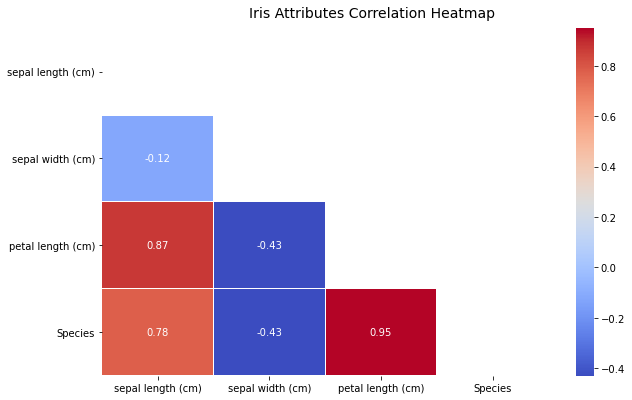

In [27]:
f, ax = plt.subplots(figsize=(10, 6))
corr = iris_df[iris_df.columns[:4]].corr()
mask = np.zeros_like(iris_df[iris_df.columns[:4]].corr())
mask[np.triu_indices_from(mask)] = 1
hm = sns.heatmap(round(corr, 2),
                 annot=True,
                 ax=ax,
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05,mask=mask)
f.subplots_adjust(top=0.93)
t = f.suptitle('Iris Attributes Correlation Heatmap', fontsize=14)
del corr, f, ax, hm, t, mask

    As, we can see the co-relation between "Petal-length" & "Petal-Width" is substantially high so, we can chose either one for further analysis and still capture considerable information.

In [23]:
iris_df = iris_df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'Species',
    'Species_Name'
]].copy()

In [24]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),Species,Species_Name
0,5.1,3.5,1.4,0.0,setosa
1,4.9,3.0,1.4,0.0,setosa
2,4.7,3.2,1.3,0.0,setosa
3,4.6,3.1,1.5,0.0,setosa
4,5.0,3.6,1.4,0.0,setosa


In [33]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'Species',
       'Species_Name'],
      dtype='object')

## Bi-Variate Analysis

    Using 2 features we will try and see the separation between the respective clusters  

### Sepal-Length Vs Sepal-Width  

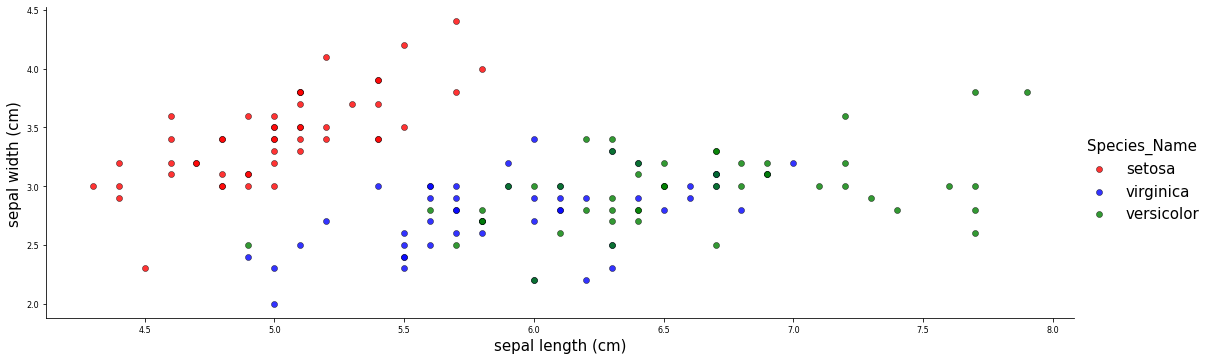

In [76]:
sns.lmplot(x='sepal length (cm)',
           y='sepal width (cm)',
           hue='Species_Name',
           palette={
               "setosa": "red",
               "virginica": "blue",
               "versicolor": 'green'
           },
           data=iris_df,
           fit_reg=False,
           legend=True,
           scatter_kws=dict(edgecolor="k", linewidth=0.5),
           height=5,
           aspect=3)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

    we can see clear separation between "setosa" and "versicolor" using just these 2 attributes however, "virginica" & "versicolor" seems to be have over lapping distributions 

#### Density-Wise Separation b/w Setosa Vs Versicolor  

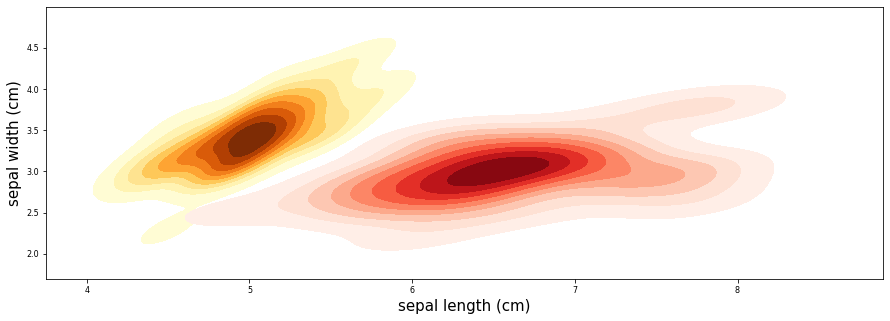

In [85]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(iris_df[iris_df.Species.isin([0.0])]['sepal length (cm)'],
                 iris_df[iris_df.Species.isin([0.0])]['sepal width (cm)'],
                 cmap="YlOrBr",
                 shade=True,
                 shade_lowest=False)
ax = sns.kdeplot(iris_df[iris_df.Species.isin([2.0])]['sepal length (cm)'],
                 iris_df[iris_df.Species.isin([2.0])]['sepal width (cm)'],
                 cmap="Reds",
                 shade=True,
                 shade_lowest=False)
del ax

#### Density-Wise Separation b/w Setosa Vs Virginica

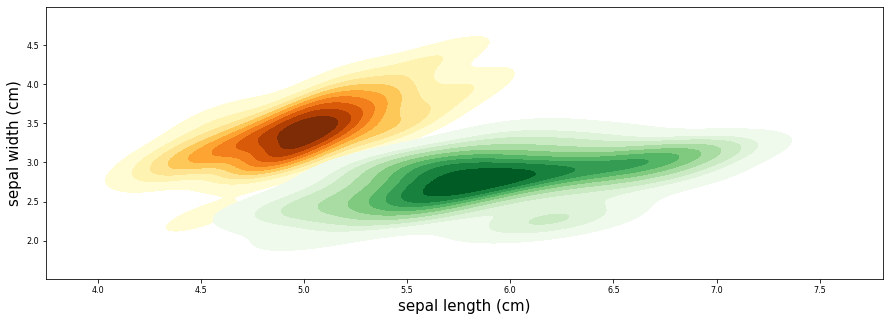

In [88]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(iris_df[iris_df.Species.isin([0.0])]['sepal length (cm)'],
                 iris_df[iris_df.Species.isin([0.0])]['sepal width (cm)'],
                 cmap="YlOrBr",
                 shade=True,
                 shade_lowest=False)
ax = sns.kdeplot(iris_df[iris_df.Species.isin([1.0])]['sepal length (cm)'],
                 iris_df[iris_df.Species.isin([1.0])]['sepal width (cm)'],
                 cmap="Greens",
                 shade=True,
                 shade_lowest=False)
del ax

### Sepal-Width Vs Petal-Length

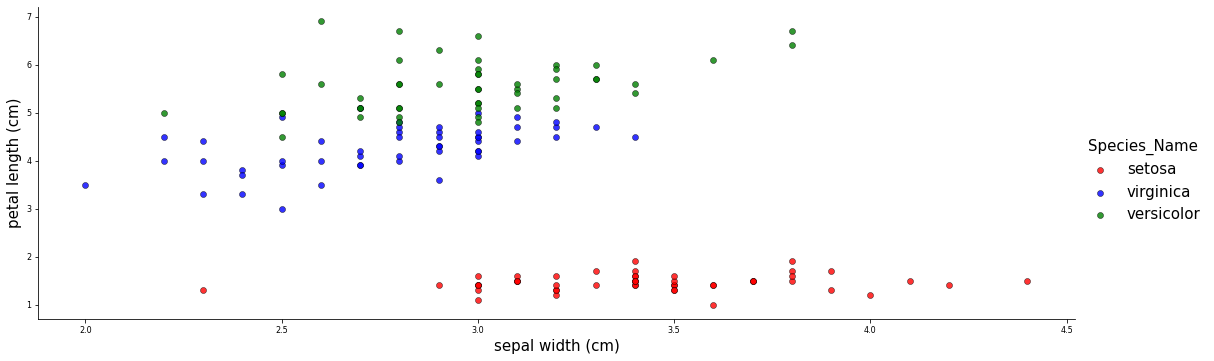

In [90]:
sns.lmplot(x='sepal width (cm)',
           y='petal length (cm)',
           hue='Species_Name',
           palette={
               "setosa": "red",
               "virginica": "blue",
               "versicolor": 'green'
           },
           data=iris_df,
           fit_reg=False,
           legend=True,
           scatter_kws=dict(edgecolor="k", linewidth=0.5),
           height=5,
           aspect=3)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

###  Sepal-Length Vs Petal-Length

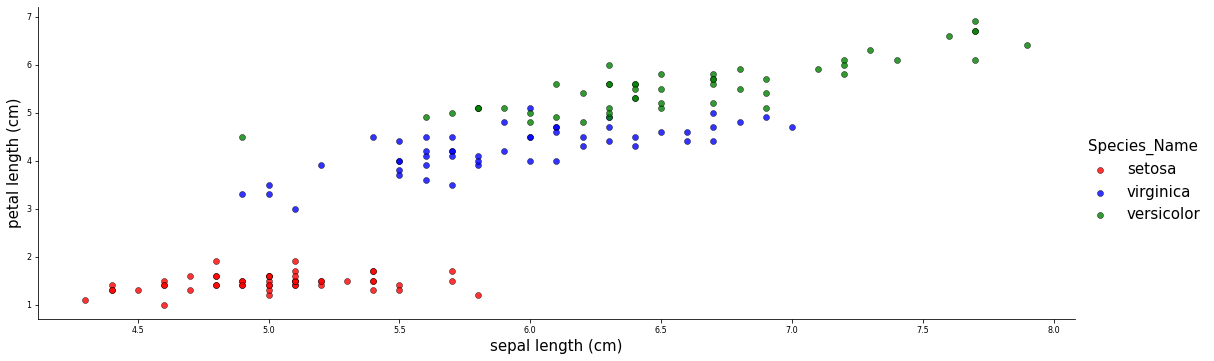

In [91]:
sns.lmplot(x='sepal length (cm)',
           y='petal length (cm)',
           hue='Species_Name',
           palette={
               "setosa": "red",
               "virginica": "blue",
               "versicolor": 'green'
           },
           data=iris_df,
           fit_reg=False,
           legend=True,
           scatter_kws=dict(edgecolor="k", linewidth=0.5),
           height=5,
           aspect=3)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

## Tri-Variate Analysis

    Now, we can see using two attributes we can acheive clear sepration between two clusters. Let's check if we can acheive separation between all the cluster in higher dimension using all the 3 attributes 

In [92]:
from mpl_toolkits.mplot3d import Axes3D

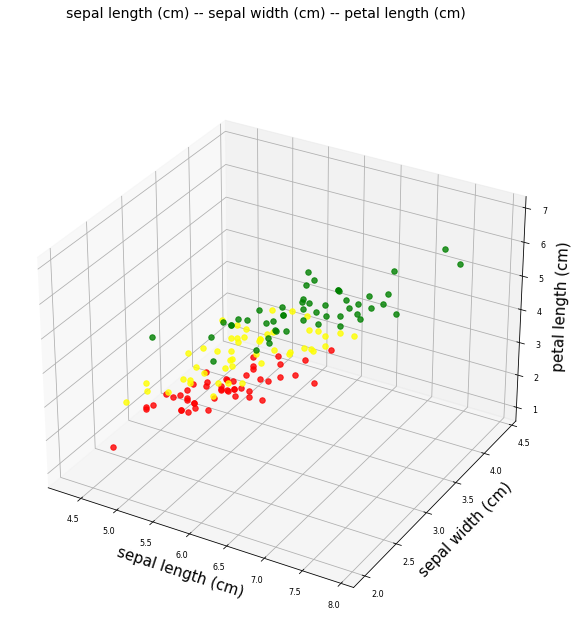

In [132]:
fig = plt.figure(figsize=(15, 10))
t = fig.suptitle('sepal length (cm) -- sepal width (cm) -- petal length (cm)',
                 fontsize=14)
ax = fig.add_subplot(111, projection='3d')
xs = list(iris_df['sepal length (cm)'])
ys = list(iris_df['sepal width (cm)'])
zs = list(iris_df['petal length (cm)'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = list(
    np.where(iris_df.Species == 0.0, 'red',
             np.where(iris_df.Species == 1.0, 'yellow', 'green')))

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.8, c=color,s=30)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
del fig, t, ax, xs, ys, zs, data_points, colors, x, y, z, data, color

In [141]:
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [144]:
iris_setosa = iris_df[iris_df['Species'] == 0.0]

#  Data of Versicolor
iris_versicolor = iris_df[iris_df['Species'] == 2.0]

#  Data of Virginica
iris_virginica = iris_df[iris_df['Species'] == 1.0]

# set1 =  Setosa
trace1 = go.Scatter3d(x=iris_setosa['sepal length (cm)'],
                      y=iris_setosa['sepal width (cm)'],
                      z=iris_setosa['petal length (cm)'],
                      mode='markers',
                      name="iris_setosa",
                      marker=dict(color='rgb(217, 100, 100)',
                                  size=12,
                                  line=dict(color='rgb(255, 255, 255)',
                                            width=0.1)))
# set2 =  Versicolor
trace2 = go.Scatter3d(x=iris_versicolor['sepal length (cm)'],
                      y=iris_versicolor['sepal width (cm)'],
                      z=iris_versicolor['petal length (cm)'],
                      mode='markers',
                      name="iris_versicolor",
                      marker=dict(color='rgb(0, 128, 225)',
                                  size=12,
                                  line=dict(color='rgb(204, 204, 204)',
                                            width=0.1)))

# set3 =  Virginica
trace3 = go.Scatter3d(x=iris_virginica['sepal length (cm)'],
                      y=iris_virginica['sepal width (cm)'],
                      z=iris_virginica['petal length (cm)'],
                      mode='markers',
                      name="iris_virginica",
                      marker=dict(color='rgb(54, 170, 127)',
                                  size=12,
                                  line=dict(color='rgb(204, 204, 204)',
                                            width=0.1)))

data = [trace1, trace2, trace3]
layout = go.Layout(
    title=' 3D plot of Setosa, Versicolor and Virginica',
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Sepal-Length(Cm)'),
        yaxis=dict(title='Sepal-Width(Cm)'),
        zaxis=dict(title='Petal-Length(Cm)'),
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
del fig, data, layout, trace3, trace2, trace1, iris_setosa, iris_versicolor, iris_virginica

    As we can see there is no clear cluster available for "Virginica" & "Versicolor". However, clear separation can be observed with "setosa"

    Now, we will you clustering algorithm to learn pattern from the data and cluster a unseen data set 

# Particle Swarm Optimization (PSO)

# Ordering Points To Identify the Clustering Structure (OPTICS)